# AEA Lab Session 4 - Regression Discontinuity Design

**Authors:**
Ulrike Unterhofer and Véra Zabrodina

## Application: Meyersson E., Islamic Rule and the Empowerment of the Poor and Pious (Econometrica, 2014)

Bla bla about the application here - cf notes RDD

CIT refers to Cattaneo Idrobo Titunik, 2019 


Possibly table with variable description:

|variable name |   description |
|----:|----:|
| X              | Islamic Margin of Victory |
| Y              | Female High School percentage |
| D              | Islamic rule |
| ageshr19       | Percentage of population below 19 in 2000 |
| ageshr60       | Percentage of population above 60 in 2000 |
| buyuk          | Metro center |
| hischshr1520m  | Percentage of men aged 15-20 with high school education |
| i89            | Islamic Mayor in 1989 |
| lpop1994       | Log population in 1994 |
| merkezi        | District center |
| merkezp        | Province center |
| partycount     | Number of parties receiving votes 1994 |
| prov_num       | Province number    |
| sexr           | Gender ratio in 2000 |
| shhs           | Household size in 2000 |
| subbuyuk       | Sub-metro center |
| vshr_islam1994 | Islamic percentage of votes in 1994 |

## Load packages

In [1]:
########################  Load Packages  ########################

# List of required packages
packages_vector <- c("tidyverse", "foreign", "haven", "Hmisc", "dplyr", "tidyr", "stringr", "dummies", "sandwich", "lmtest",
     "expss", "fastDummies", "psych", "fBasics", "knitr", "xtable", "sjlabelled", "data.table", "lubridate", "arsenal", "stargazer", "mfx", "jtools")
lapply(packages_vector, require, character.only = TRUE) 

# RDD-specific packages 
packaged_vector_rdd <- c("foreign", "ggplot2", "grid", "lpdensity", "rddensity", "rdlocrand", "rdrobust", "TeachingDemos")
lapply(packaged_vector_rdd, require, character.only = TRUE) 

# List loaded packages 
(.packages())

print('All packages successfully installed and loaded.')

Loading required package: tidyverse

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'tibble' 2.1.3 is already loaded, but >= 3.0.0 is required

Loading required package: foreign

Loading required package: haven

Warning message:
"package 'haven' was built under R version 3.6.3"
Loading required package: Hmisc

Warning message:
"package 'Hmisc' was built under R version 3.6.3"
Loading required package: lattice

Loading required package: survival

Warning message:
"package 'survival' was built under R version 3.6.3"
Loading required package: Formula

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units


Loading required package: dplyr

Warning message:
"package 

[[1]]
[1] FALSE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

Loading required package: grid

Loading required package: lpdensity

Warning message:
"package 'lpdensity' was built under R version 3.6.3"
Loading required package: rddensity

Warning message:
"package 'rddensity' was built under R version 3.6.3"
Loading required package: rdlocrand

Warning message:
"package 'rdlocrand' was built under R version 3.6.3"
Loading required package: rdrobust

Warning message:
"package 'rdrobust' was built under R version 3.6.3"
Loading required package: TeachingDemos

Warning message:
"package 'TeachingDemos' was built under R version 3.6.3"

Attaching package: 'TeachingDemos'


The following object is masked from 'package:xtable':

    digits


The following objects are masked from 'package:Hmisc':

    cnvrt.coords, subplot




[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[1] "TeachingDemos" "rdrobust"      "rdlocrand"     "rddensity"    
 [5] "lpdensity"     "grid"          "jtools"        "mfx"          
 [9] "betareg"       "MASS"          "stargazer"     "arsenal"      
[13] "lubridate"     "data.table"    "sjlabelled"    "xtable"       
[17] "knitr"         "fBasics"       "timeSeries"    "timeDate"     
[21] "psych"         "fastDummies"   "expss"         "lmtest"       
[25] "zoo"           "sandwich"      "dummies"       "stringr"      
[29] "tidyr"         "dplyr"         "Hmisc"         "ggplot2"      
[33] "Formula"       "survival"      "lattice"       "haven"        
[37] "foreign"       "stats"         "graphics"      "grDevices"    
[41] "utils"         "datasets"      "methods"       "base"

[1] "All packages successfully installed and loaded."


## Load data 

In [3]:
# Load data frame
data <-as.data.frame(read_dta("data_meyersson.dta"))

# Inspect data
head(data)

# Vector with all variable names
varnames <- colnames(data)

# Store each variable in own R object
attach(data)

# Options for RD plots
# options(width=280)
par(mar = rep(2, 4))
xlabel <- "Islamic Margin of Victory"
ylabel <- "Female High School percentage"
dlabel <- "Islamic rule"

options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

,X,Y,D,ageshr19,ageshr60,buyuk,hischshr1520m,i89,lpop1994,merkezi,merkezp,partycount,prov_num,sexr,shhs,subbuyuk,vshr_islam1994
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-35.60663,22.96296,0,42.20857,7.506742,0,37.93103,0,7.996990,1,0,6,1,97.74815,4.670399,0,1.5448381
2,-54.34782,25.43860,0,44.09879,6.340537,0,30.89005,0,7.362645,0,0,4,1,112.03424,6.813916,0,2.5135870
3,-20.40923,22.68273,0,43.54768,5.539970,1,22.62840,0,13.175261,1,0,14,1,97.46254,4.389300,0,11.1114979
4,-44.97206,15.85366,0,43.86755,6.649007,0,17.11712,0,7.623153,0,0,6,1,102.52145,5.510949,0,5.5865922
5,-20.11494,18.23899,0,41.81067,5.447032,0,17.31343,0,7.647786,0,0,7,1,118.10733,6.234192,0,10.1880875
6,-50.58997,25.00000,0,40.53058,6.963891,0,26.56250,NA,7.312553,0,0,5,1,101.78439,6.004425,0,0.5899705


The following objects are masked from data (pos = 3):

    ageshr19, ageshr60, buyuk, D, hischshr1520m, i89, lpop1994,
    merkezi, merkezp, partycount, prov_num, sexr, shhs, subbuyuk,
    vshr_islam1994, X, Y




## Descriptive statistics and validity checks

### Summary statistics by treatment status

In [4]:
# Number of treated and control
cro(D)

# Table 1 in Meyersson
# Summary statistics - Pooled 
desc <- fBasics::basicStats(data) %>% t() %>% as.data.frame() %>% dplyr::select(Mean, Stdev, Minimum, Maximum, nobs, NAs)
print(round(desc, digits=2))

,,#Total
Islamic rule,0,2314
,1,315
,#Total cases,2629


                 Mean Stdev Minimum Maximum nobs NAs
X              -28.14 22.11 -100.00   99.05 2629   0
Y               16.31  9.58    0.00   68.04 2629   0
D                0.12  0.32    0.00    1.00 2629   0
ageshr19        40.51  8.30    6.54   68.76 2629   0
ageshr60         9.22  3.96    1.66   27.23 2629   0
buyuk            0.01  0.08    0.00    1.00 2629   0
hischshr1520m   19.24  7.74    0.00   68.31 2629   0
i89              0.04  0.19    0.00    1.00 2629 721
lpop1994         7.84  1.19    5.49   15.34 2629   0
merkezi          0.34  0.48    0.00    1.00 2629   0
merkezp          0.02  0.15    0.00    1.00 2629   0
partycount       5.54  2.19    1.00   14.00 2629   0
prov_num        41.18 22.90    1.00   81.00 2629   0
sexr           107.32 25.29   74.99 1033.64 2629   0
shhs             5.84  2.36    2.82   33.63 2629   0
subbuyuk         0.02  0.15    0.00    1.00 2629   0
vshr_islam1994  13.87 15.38    0.00   99.53 2629   0


In [5]:
# Summary statistics - Treated 
desc_treat <- dplyr::filter(data, D==1) %>% fBasics::basicStats() %>% t() %>% as.data.frame() %>% dplyr::select(Mean, Stdev, Minimum, Maximum, nobs, NAs)
print(round(desc_treat, digits=2))

                 Mean Stdev Minimum Maximum nobs NAs
X               10.27 10.73    0.05   99.05  315   0
Y               14.04  9.02    0.00   48.09  315   0
D                1.00  0.00    1.00    1.00  315   0
ageshr19        44.53  7.54   27.24   67.85  315   0
ageshr60         7.27  3.11    2.47   24.19  315   0
buyuk            0.02  0.14    0.00    1.00  315   0
hischshr1520m   19.61  7.64    2.22   40.82  315   0
i89              0.15  0.36    0.00    1.00  315  90
lpop1994         8.32  1.77    5.49   15.34  315   0
merkezi          0.39  0.49    0.00    1.00  315   0
merkezp          0.07  0.25    0.00    1.00  315   0
partycount       5.89  3.02    2.00   14.00  315   0
prov_num        42.70 21.34    1.00   80.00  315   0
sexr           107.62 11.71   78.03  165.55  315   0
shhs             6.44  2.15    3.37   14.36  315   0
subbuyuk         0.08  0.27    0.00    1.00  315   0
vshr_islam1994  41.45 11.43   18.97   99.53  315   0


In [6]:
# Summary statistics - Control 
desc_control <- dplyr::filter(data, D==0) %>% fBasics::basicStats() %>% t() %>% as.data.frame() %>% dplyr::select(Mean, Stdev, Minimum, Maximum, nobs, NAs)
print(round(desc_control, digits=2))

                 Mean Stdev Minimum Maximum nobs NAs
X              -33.37 17.65 -100.00   -0.10 2314   0
Y               16.61  9.62    0.00   68.04 2314   0
D                0.00  0.00    0.00    0.00 2314   0
ageshr19        39.96  8.25    6.54   68.76 2314   0
ageshr60         9.49  3.99    1.66   27.23 2314   0
buyuk            0.00  0.06    0.00    1.00 2314   0
hischshr1520m   19.19  7.75    0.00   68.31 2314   0
i89              0.02  0.14    0.00    1.00 2314 631
lpop1994         7.77  1.07    5.85   14.04 2314   0
merkezi          0.34  0.47    0.00    1.00 2314   0
merkezp          0.02  0.13    0.00    1.00 2314   0
partycount       5.49  2.05    1.00   14.00 2314   0
prov_num        40.97 23.11    1.00   81.00 2314   0
sexr           107.28 26.61   74.99 1033.64 2314   0
shhs             5.75  2.38    2.82   33.63 2314   0
subbuyuk         0.01  0.12    0.00    1.00 2314   0
vshr_islam1994  10.12 11.55    0.00   49.79 2314   0


### Existence of discontinuity: Plot D against X

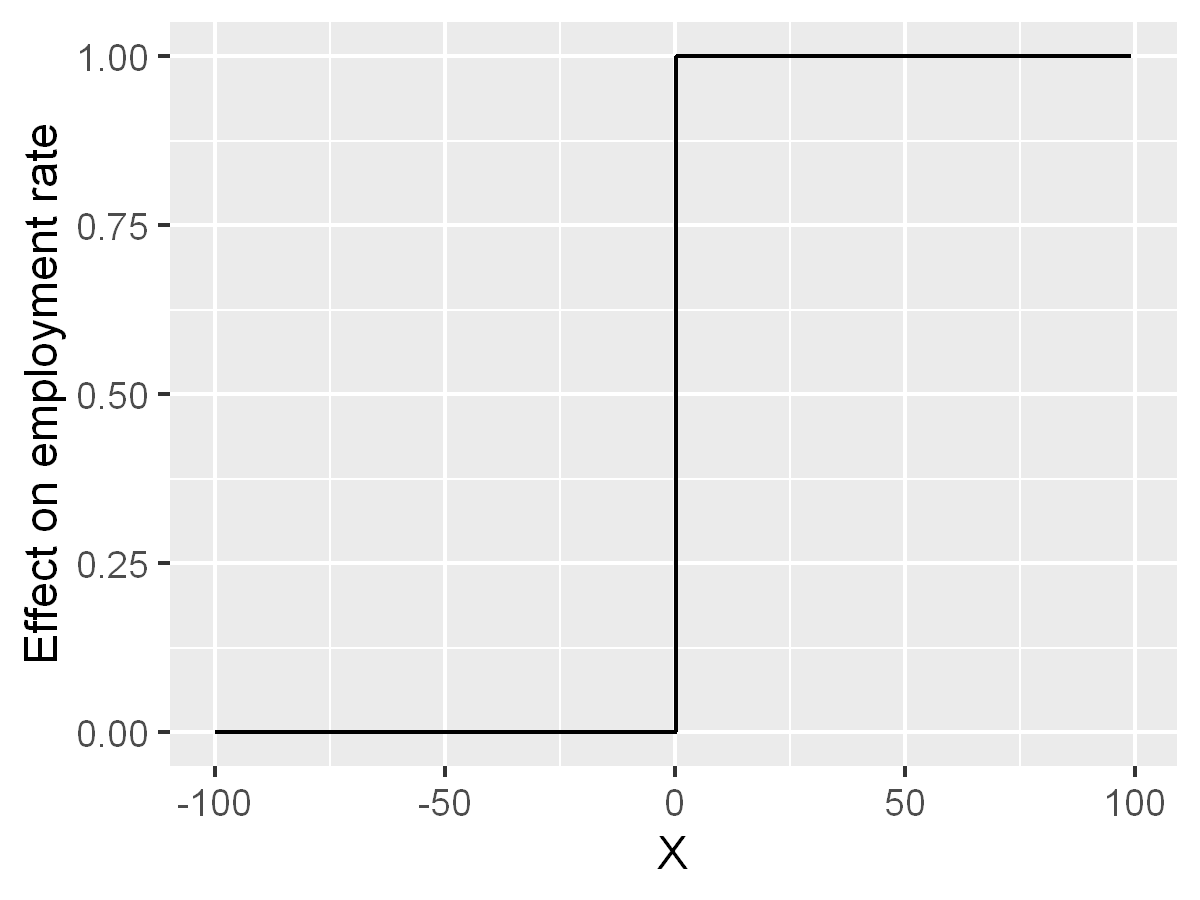

In [7]:
ggplot(data,                
       aes(x = X, y = D)) +
 	   geom_line() +
 	   ylab("Effect on employment rate") 

### Descriptive evidence of effect: plot Y against X

In [ ]:
# Figure 3a in CIT
# Raw comparison of means (no polynomial)
rdplot(Y, X, nbins = c(2500, 500), p = 0, title = "", x.label = xlabel, y.label = ylabel)

# Figure 3b in CIT
# Local comparison of means within 50 percentage points bandwidth, but same number of bins
rdplot(Y[abs(X) <= 50], X[abs(X) <= 50], nbins = c(2500, 500), p = 4, title = "", x.label = xlabel, y.label = ylabel)

###  No sorting in X: plot histogram of X 

In [ ]:
# Histogram 
# Figure 19a in CIT 2019, Figure 2(a) in Meyersson 2014

# Specify bandwidth manually 
# Useful to plot across the full range of possible values of the running variable 
bw <- as.numeric(100)

plot1 = ggplot(data=data, aes(X)) + 
  geom_histogram(data = data, aes(x = X, y= ..count..), breaks = seq(-bw, 0, 2), fill = "blue", col = "black", alpha = 1) +
  geom_histogram(data = data, aes(x = X, y= ..count..), breaks = seq(0, bw, 2), fill = "red", col = "black", alpha = 1) +
  labs(x = xlabel, y = "Number of Observations") + 
  geom_vline(xintercept = 0, color = "black") 
plot1

###  No sorting in X: plot density of X 

In [ ]:
# Estimated Density
# Figure 19b in CIT, Figure 2(b) in Meyersson 

# Specify bandwidth manually, within a bandwidth that makes sense depending on histogram (i.e. where is mass)
bw = as.numeric(30)


est1 = lpdensity(data = X[X < 0 & X >= -bw], grid = seq(-bw, 0, 0.1), bwselect = "IMSE",
                 scale = sum(X < 0 & X >= -bw) / length(X))
est2 = lpdensity(data = X[X >= 0 & X <= bw], grid = seq(0, bw, 0.1), bwselect = "IMSE",
                 scale = sum(X >= 0 & X <= bw) / length(X))
plot2 = lpdensity.plot(est1, est2, CIshade = 0.2, lcol = c(4, 2), CIcol = c(4, 2), legendGroups = c("Control", "Treatment"))+
  labs(x = xlabel, y = "Density") + 
  geom_vline(xintercept = 0, color = "black") +
  theme(legend.position = c(0.8, 0.85))
plot2


### No sorting in X: test for discontinuities in density 

In [ ]:
# RD Manipulation Test using local polynomial density estimation.
out = rddensity(X)
summary(out)

### No sorting in covariates: plot covariates against X

In [ ]:
# Figure 16 in CIT, Figure 3 in Meyersson
# Just plots, do not serve as formal inference

bw <- as.numeric(100)

plot_covariate <-rdplot(vshr_islam1994, X, h = bw, x.label = xlabel, y.label = "vshr_islam1994", title = "")
plot_ageshr60 <-rdplot(ageshr60, X, h = bw, x.label = xlabel, y.label = "ageshr60", title = "")
plot_ageshr19 <-rdplot(ageshr19, X, h = bw, x.label = xlabel, y.label = "ageshr19", title = "")
plot_lpop1994 <-rdplot(lpop1994, X, h = bw, x.label = xlabel, y.label = "lpop1994", title = "")
plot_sexr <-rdplot(sexr, X, h = bw, x.label = xlabel, y.label = "sexr", title = "")
plot_partycount <-rdplot(partycount, X, h = bw, x.label = xlabel, y.label = "partycount", title = "")

### No sorting in covariates: covariates as outcome

This part serves for formal inference -- see RDD estimation part below 

In [ ]:
covariates <- as.matrix(dplyr::select(data, lpop1994, vshr_islam1994, partycount, ageshr60, ageshr19, sexr, shhs, merkezi, merkezp, subbuyuk, buyuk))
covariates <- cbind(covariates)
covariates_names <- colnames(covariates)

covariate_rd <- function(covariate) {

	out <- rdrobust(covariate, X)
	summary(out)
	list(effect=out$Estimate[[1]], se=out$Estimate[[3]])  

}

covariate_out <- apply(covariates, 2, covariate_rd)


# convert list to table
covariate_table <- rbindlist(covariate_out)
covariate_table


# Export table with all estimates 
rownames(covariate_table) <- covariates_names
xtable(covariate_table, digits =3)

## RDD effect estimation and robustness checks

Can run different combinations of all of these
Optimal bandwidth choice algorithm differs from Meyersson

Replicating Table II Panel A (Women), Meyersson 

Global OLS estimation without covariates (raw difference in means using all observations) 

In [ ]:
# Create matrix to store effects
effects <- matrix(, nrow = 5, ncol = 8)


# Col (1)
out <- lm(Y ~ D)
out <- summ(out)
out
effects[1,1] <- out$coeftable[2,1] 		# effect
effects[2,1] <- out$coeftable[2,2] 		# se
effects[3,1] <- 100 					# bandwidth left 
effects[4,1] <- 100 					# bandwidth right 
effects[5,1] <- nrow(out$model$model) 	# total number of observations

Parametric estimation with covariates (using all observations, i.e. global estimation)

In [ ]:
# Col (2)
out <- lm(Y ~ D + covariates)
out <- summ(out)
out
effects[1,2] <- out$coeftable[2,1]
effects[2,2] <- out$coeftable[2,2] 
effects[3,2] <- 100
effects[4,2] <- 100
effects[5,2] <- nrow(out$model$model)

Local linear regression (nonparametric as in CIT, vs. Meyersson, parametric estimation)

In [ ]:
# using all observations
out <- rdrobust(Y, X, kernel = "triangular", scaleregul = 1, p = 1, h = 100)
summary(out)

In [ ]:
# Col (3) with optimal bandwidth selection 
out <- rdrobust(Y, X, kernel = "triangular", scaleregul = 1, p = 1, bwselect = "mserd")

summary(out)
effects[1,3] <- out$Estimate[[1]]
effects[2,3] <- out$Estimate[[3]]
effects[3,3] <- out$bws[[1]]
effects[4,3] <- out$bws[[2]]
effects[5,3] <- out$N[[1]] + out$N[[2]]

In [ ]:
# Col (4) with covariates
out <- rdrobust(Y, X, covs = covariates, kernel = "triangular", scaleregul = 1, p = 1, bwselect = "mserd")

summary(out)
effects[1,4] <- out$Estimate[[1]]
effects[2,4] <- out$Estimate[[3]]
effects[3,4] <- out$bws[[1]]
effects[4,4] <- out$bws[[2]]
effects[5,4] <- out$N[[1]] + out$N[[2]]

Vary sample around cutoff

In [ ]:
# Store h from previous estimation
bw_left <- as.numeric(out$bws[[1]])
bw_right <- as.numeric(out$bws[[2]])


# Col (5) with h/2
out = rdrobust(Y, X, h = c(bw_left/2, bw_right/2), kernel = "triangular", p = 1)

summary(out)
effects[1,5] <- out$Estimate[[1]]
effects[2,5] <- out$Estimate[[3]]
effects[3,5] <- out$bws[[1]]
effects[4,5] <- out$bws[[2]]
effects[5,5] <- out$N[[1]] + out$N[[2]]


# Col (6) with 2h
out = rdrobust(Y, X, h = c(bw_left*2, bw_right*2), kernel = "triangular", p = 1)

summary(out)
effects[1,6] <- out$Estimate[[1]] 
effects[2,6] <- out$Estimate[[3]] 
effects[3,6] <- out$bws[[1]] 
effects[4,6] <- out$bws[[2]] 
effects[5,6] <- out$N[[1]] + out$N[[2]] 

Higher order polynomials of (Xi - x) 

In [ ]:
# Col (7), quadratic
out = rdrobust(Y, X, covs = covariates, kernel = "triangular", p = 2, bwselect = "mserd")

summary(out)
effects[1,7] <- out$Estimate[[1]]
effects[2,7] <- out$Estimate[[3]]
effects[3,7] <- out$bws[[1]]
effects[4,7] <- out$bws[[2]]
effects[5,7] <- out$N[[1]] + out$N[[2]]


# Col (8), cubic
out = rdrobust(Y, X, covs = covariates, kernel = "triangular", p = 3, bwselect = "mserd")

summary(out)
effects[1,8] <- out$Estimate[[1]]
effects[2,8] <- out$Estimate[[3]]
effects[3,8] <- out$bws[[1]]
effects[4,8] <- out$bws[[2]]
effects[5,8] <- out$N[[1]] + out$N[[2]]


# Export table with all estimates 

rownames(effects) <- c("Effect", "SE", "Bw left", "Bw right", "Total obs")
xtable(effects, digits =3)

### EXTENSION 1: EFFECT HETEROGENEITY

In [ ]:
# Table V Panel C, Meyersson 

# Restrict sample to bandwidth of 25
# Only after, split at median of Islam vote share
median <- as.numeric(median(vshr_islam1994[abs(X)<=25]))
median

# Col (1) above median 
out = rdrobust(Y[vshr_islam1994 >= median], X[vshr_islam1994 >= median], kernel = "triangular", p = 1, h = 25)
summary(out)

# Col (2) below median 
out = rdrobust(Y[vshr_islam1994 < median], X[vshr_islam1994 < median], kernel = "triangular", p = 1, h = 25)
summary(out)


### EXTENSION 2: DONUT HOLE APPROACH 

Test for excluding different ranges of observations right next to the cutoff 

In [ ]:
donut_range <- as.matrix(c(0, 0.1, 0.2, 0.3, 0.4, 0.5))

donut_tests <- function(donut) {          
	
	if (is.numeric(donut)) {
		out = rdrobust(Y[abs(X) >= donut], X[abs(X) >= donut], kernel = "triangular", p = 1)
		list(effect=out$Estimate[[1]], se=out$Estimate[[3]])  
	} else {
		print("ERROR - Donut range must be numeric")
	}

}

donut_out <- apply(donut_range, 1, donut_tests)


# convert list to table
donut_table <- rbindlist(donut_out)
donut_table